In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits.data.shape

(1797, 64)

In [11]:
print("Les noms des attributs de deigts sont : {}".format(dir(digits)))

Les noms des attributs de deigts sont : ['DESCR', 'data', 'images', 'target', 'target_names']


In [12]:
digits.target.shape

(1797,)

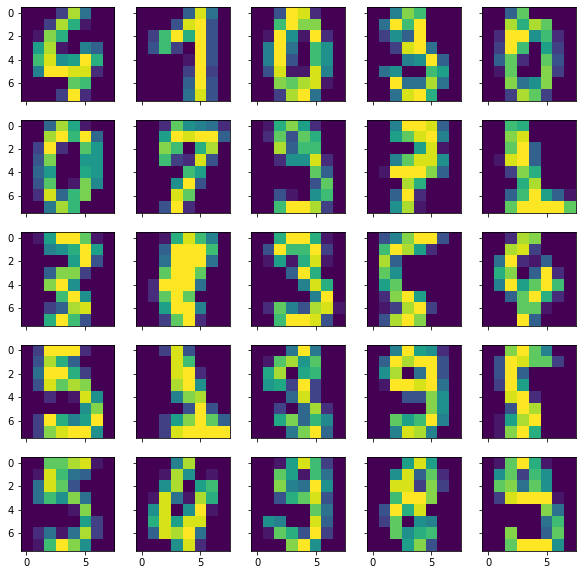

In [18]:
import numpy as np
indices = np.random.randint(0 , digits.data.shape[0] , 100)

fig , axes = plt.subplots(5 , 5 , sharex = True , sharey = True , figsize = (10 , 10))

k = 0

for i in range(5):
    for j in range(5):
        axes[i , j].imshow(digits.images[indices[k]])
        k += 1
plt.show()

In [19]:
x= np.asmatrix(digits.data)
y=np.array(digits.target)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
print("Dimensions de x_train : {}".format(x_train.shape))
print("Dimensions de x_test : {}".format(x_test.shape))
print("Dimensions de y_train : {}".format(y_train.shape))
print("Dimensions de y_test : {}".format(y_test.shape))

Dimensions de x_train : (1203, 64)
Dimensions de x_test : (594, 64)
Dimensions de y_train : (1203,)
Dimensions de y_test : (594,)


In [22]:
clfs = KNeighborsClassifier(n_neighbors=5)
clfs.fit(x_train,y_train)
y_pred = clfs.predict(x_test)

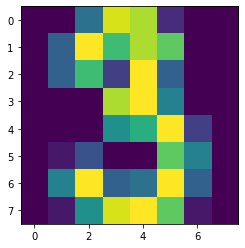

In [31]:
plt.imshow(x_test[10].reshape(8,8))
plt.show()

In [26]:
accuracy = clfs.score(x_test,y_test)
risk = 1-accuracy


In [28]:
print("Accuracy: {}".format(accuracy))
print("risk: {}".format(risk))

Accuracy: 0.9831649831649831
risk: 0.01683501683501687


In [29]:
#matrice de confusion
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,56,0,0,0,1,0,0,0,0,0
1,0,53,0,0,0,0,0,0,0,0
2,0,0,56,0,0,0,0,1,0,0
3,0,0,0,51,0,0,0,0,0,0
4,0,0,0,0,59,0,0,1,0,0
5,0,0,0,0,0,75,0,0,0,0
6,0,0,0,0,0,0,67,0,1,0
7,0,0,0,0,0,0,0,59,0,0
8,0,3,0,0,0,0,0,1,55,0


In [33]:
#Selection du nombre optimal de voisine
vect_k = np.arange(1,21)
vect_k


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [36]:
nbre_k = vect_k.shape[0]
vect_risk = np.zeros(nbre_k)
for i in range(nbre_k):
    clf = KNeighborsClassifier(n_neighbors=vect_k[i])
    clf.fit(x_train,y_train)
    vect_risk[i] = 1-clf.score(x_test,y_test)
pd.DataFrame(np.c_[vect_k,vect_risk],columns=["k","Risk"])

,k,Risk
0,1.0,0.010101
1,2.0,0.016835
2,3.0,0.011785
3,4.0,0.016835
4,5.0,0.016835
5,6.0,0.020202
6,7.0,0.020202
7,8.0,0.021886
8,9.0,0.023569
9,10.0,0.025253


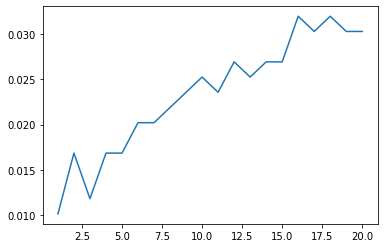

In [39]:
plt.plot(vect_k , vect_risk)
plt.show()